<a href="https://colab.research.google.com/github/dvarkless/InnopolisDS/blob/main/homeworks/LSTM_Sentiment_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# All the imports!
import tensorflow as tf 
import numpy as np
from tensorflow.keras.preprocessing import sequence
from numpy import array

# Supress deprecation warnings
import logging
logging.getLogger('tensorflow').disabled = True

# Fetch "IMDB Movie Review" data, constraining our reviews to 
# the 10000 most commonly used words
vocab_size = 2000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

# Map for readable classnames
class_names = ["Negative", "Positive"]

2022-09-21 22:56:33.896131: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-21 22:56:34.625276: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-21 22:56:35.977920: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-09-21 22:56:35.977989: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [ ]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 1920,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 

## Создать карту для преобразования набора данных IMDB в удобочитаемые обзоры

Обзоры в наборе данных IMDB были закодированы как последовательность целых чисел. К счастью, набор данных также
содержит указатель для преобразования отзывов в удобочитаемую форму.

In [ ]:
# Get the word index from the dataset
word_index = tf.keras.datasets.imdb.get_word_index()

# Ensure that "special" words are mapped into human readable terms 
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNKNOWN>"] = 2
word_index["<UNUSED>"] = 3

# Perform reverse word lookup and make it callable
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [ ]:
word_index#[:10]


{'fawn': 34704,
 'tsukino': 52009,
 'nunnery': 52010,
 'sonja': 16819,
 'vani': 63954,
 'woods': 1411,
 'spiders': 16118,
 'hanging': 2348,
 'woody': 2292,
 'trawling': 52011,
 "hold's": 52012,
 'comically': 11310,
 'localized': 40833,
 'disobeying': 30571,
 "'royale": 52013,
 "harpo's": 40834,
 'canet': 52014,
 'aileen': 19316,
 'acurately': 52015,
 "diplomat's": 52016,
 'rickman': 25245,
 'arranged': 6749,
 'rumbustious': 52017,
 'familiarness': 52018,
 "spider'": 52019,
 'hahahah': 68807,
 "wood'": 52020,
 'transvestism': 40836,
 "hangin'": 34705,
 'bringing': 2341,
 'seamier': 40837,
 'wooded': 34706,
 'bravora': 52021,
 'grueling': 16820,
 'wooden': 1639,
 'wednesday': 16821,
 "'prix": 52022,
 'altagracia': 34707,
 'circuitry': 52023,
 'crotch': 11588,
 'busybody': 57769,
 "tart'n'tangy": 52024,
 'burgade': 14132,
 'thrace': 52026,
 "tom's": 11041,
 'snuggles': 52028,
 'francesco': 29117,
 'complainers': 52030,
 'templarios': 52128,
 '272': 40838,
 '273': 52031,
 'zaniacs': 52133,

In [ ]:
reverse_word_index

{34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 16819: 'sonja',
 63954: 'vani',
 1411: 'woods',
 16118: 'spiders',
 2348: 'hanging',
 2292: 'woody',
 52011: 'trawling',
 52012: "hold's",
 11310: 'comically',
 40833: 'localized',
 30571: 'disobeying',
 52013: "'royale",
 40834: "harpo's",
 52014: 'canet',
 19316: 'aileen',
 52015: 'acurately',
 52016: "diplomat's",
 25245: 'rickman',
 6749: 'arranged',
 52017: 'rumbustious',
 52018: 'familiarness',
 52019: "spider'",
 68807: 'hahahah',
 52020: "wood'",
 40836: 'transvestism',
 34705: "hangin'",
 2341: 'bringing',
 40837: 'seamier',
 34706: 'wooded',
 52021: 'bravora',
 16820: 'grueling',
 1639: 'wooden',
 16821: 'wednesday',
 52022: "'prix",
 34707: 'altagracia',
 52023: 'circuitry',
 11588: 'crotch',
 57769: 'busybody',
 52024: "tart'n'tangy",
 14132: 'burgade',
 52026: 'thrace',
 11041: "tom's",
 52028: 'snuggles',
 29117: 'francesco',
 52030: 'complainers',
 52128: 'templarios',
 40838: '272',
 52031: '273',
 52133: 'zaniacs',

## Data Insight




In [ ]:
# Concatenate test and training datasets
allreviews = np.concatenate((x_train, x_test), axis=0)

# Review lengths across test and training whole datasets
print("Maximum review length: {}".format(len(max((allreviews), key=len))))
print("Minimum review length: {}".format(len(min((allreviews), key=len))))
result = [len(x) for x in allreviews]
print("Mean review length: {}".format(np.mean(result)))

# Print a review and it's class as stored in the dataset. Replace the number
# to select a different review.
print("")
print("Machine readable Review")
print("  Review Text: " + str(x_train[60]))
print("  Review Sentiment: " + str(y_train[60]))

# Print a review and it's class in human readable format. Replace the number
# to select a different review.
print("")
print("Human Readable Review")
print("  Review Text: " + decode_review(x_train[60]))
print("  Review Sentiment: " + class_names[y_train[60]])

Maximum review length: 2494
Minimum review length: 7
Mean review length: 234.75892

Machine readable Review
  Review Text: [1, 13, 219, 14, 33, 4, 2, 22, 1413, 12, 16, 373, 175, 2, 1115, 1026, 430, 939, 16, 23, 2, 25, 43, 697, 89, 12, 16, 170, 8, 130, 262, 19, 32, 4, 665, 7, 4, 2, 322, 5, 4, 1520, 7, 4, 86, 250, 10, 10, 4, 249, 173, 16, 4, 2, 6, 19, 4, 167, 564, 5, 564, 1325, 36, 805, 8, 216, 638, 17, 2, 21, 25, 100, 376, 507, 4, 2, 15, 79, 125, 23, 567, 13, 2, 233, 36, 2, 2, 5, 81, 1672, 10, 10, 92, 437, 129, 58, 13, 69, 8, 401, 61, 1432, 39, 1286, 46, 7, 12]
  Review Sentiment: 0

Human Readable Review
  Review Text: <START> i saw this at the <UNKNOWN> film festival it was awful every <UNKNOWN> violent rich boy fantasy was on <UNKNOWN> you just knew how it was going to end especially with all the shots of the <UNKNOWN> wife and the rape of the first girl br br the worst part was the <UNKNOWN> a with the director writer and writer producer they tried to come across as <UNKNOWN> but yo

## Pre-processing Data

Нам нужно убедиться, что наши обзоры имеют одинаковую длину. Это для параметров LSTM.

Некоторые отзывы нужно будет усечь, а другие дополнить.

In [ ]:
# The length of reviews
review_length = 150

# Padding / truncated our reviews
x_train = sequence.pad_sequences(x_train, maxlen = review_length,padding='post')
x_test = sequence.pad_sequences(x_test, maxlen = review_length,padding='post')

# Check the size of our datasets. Review data for both test and training should 
# contain 25000 reviews of 500 integers. Class data should contain 25000 values, 
# one for each review. Class values are 0 or 1, indicating a negative 
# or positive review.
print("Shape Training Review Data: " + str(x_train.shape))
print("Shape Training Class Data: " + str(y_train.shape))
print("Shape Test Review Data: " + str(x_test.shape))
print("Shape Test Class Data: " + str(y_test.shape))

# Note padding is added to start of review, not the end
print("")
print("Human Readable Review Text (post padding): " + decode_review(x_train[60]))

Shape Training Review Data: (25000, 150)
Shape Training Class Data: (25000,)
Shape Test Review Data: (25000, 150)
Shape Test Class Data: (25000,)

Human Readable Review Text (post padding): <START> i saw this at the <UNKNOWN> film festival it was awful every <UNKNOWN> violent rich boy fantasy was on <UNKNOWN> you just knew how it was going to end especially with all the shots of the <UNKNOWN> wife and the rape of the first girl br br the worst part was the <UNKNOWN> a with the director writer and writer producer they tried to come across as <UNKNOWN> but you could tell they're the <UNKNOWN> that get off on violence i <UNKNOWN> anything they <UNKNOWN> <UNKNOWN> and do drugs br br don't waste your time i had to keep my boyfriend from walking out of it <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 

## Create and build LSTM Recurrent Neural Network

In [ ]:
neurons_num = 32
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        units=neurons_num  # 32 LSTM units in this layer
    ))

2022-09-21 22:56:40.895875: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 22:56:41.111875: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-09-21 22:56:41.111900: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-09-21 22:56:41.112580: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

In [ ]:
# Начнем с определения пустого стека. Мы будем использовать его для создания 
# сети, позже по слоям.
model = tf.keras.models.Sequential()

# The Embedding Layer Word2Vec
model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size, # The size of our vocabulary 
        output_dim = neurons_num, # Dimensions to which each words shall be mapped
        input_length = review_length # Length of input sequences
    )
)

# Dropout 
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

model.add(
    tf.keras.layers.LSTM(
        units=neurons_num # 32 LSTM units in this layer
    )
)

# Add a second dropout layer with the same aim as the first.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

# Все блоки LSTM подключены к одному узлу в Dense слое.
# Функция активации сигмоида определяет выходной сигнал от этого узла - значение от 0 до 1. 
#Ближе к 0 указывает на отрицательный обзор. Ближе к 1 означает положительный отзыв.
model.add(
    tf.keras.layers.Dense(
        units=1, # Single unit
        activation='sigmoid' # Sigmoid activation function (output from 0 to 1)
    )
)

# Compile the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy']) # reporting metric

# Display a summary of the models structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 32)           64000     
                                                                 
 dropout (Dropout)           (None, 150, 32)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 72,353
Trainable params: 72,353
Non-trainable params: 0
_________________________________________________________________


## Visualise the Model

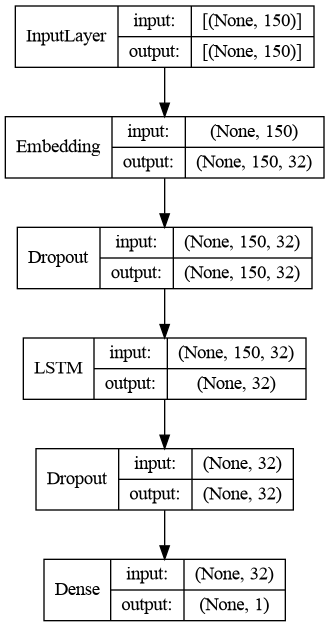

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

## Train the LSTM

In [ ]:
# Train the LSTM on the training data
goal_loss = 0.35
best_loss = 10000
patience = 3
patience_count = patience
for i in range(20):
    print(f"=== On epoch {i+1}/20: ===")
    print('Training:')
    history = model.fit(
        x_train, y_train,                   
        batch_size=128, 
        epochs=1, 
        verbose=1
    ) 
    print('Evaluating:')
    loss, _ = model.evaluate(x_test,y_test)

    if loss > best_loss:
        best_loss *= 1.03
        patience_count -= 1
    else:
        best_loss = loss
        patience_count = patience

    if loss < goal_loss:
        print('Goal reached, stopping now')
        break
    if patience_count <= 0:
        print('It only getting worse, stopping now')
        break


=== On epoch 1/20: ===
Training:
196/196 [==============================] - 15s 67ms/step - loss: 0.5441 - accuracy: 0.7060
Evaluating:
782/782 [==============================] - 9s 11ms/step - loss: 0.3706 - accuracy: 0.8400
Goal reached, stopping now


## ИЗМЕНЕНИЯ:
Длина отзыва уменьшена с 250 до 150
Размер словаря уменьшен с 10000 до 2000 (Не оказывает влияния на точность)


## Evaluate model with test data and view results

In [ ]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 9s 11ms/step - loss: 0.3706 - accuracy: 0.8400


[0.37059783935546875, 0.8400400280952454]

In [ ]:
# Get Model Predictions for test data
from sklearn.metrics import classification_report
predicted_classes = np.argmax(model.predict(x_test),axis=1)
print(classification_report(y_test, predicted_classes, target_names=class_names, zero_division=1))

782/782 [==============================] - 9s 11ms/step
              precision    recall  f1-score   support

    Negative       0.50      1.00      0.67     12500
    Positive       1.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.75      0.50      0.33     25000
weighted avg       0.75      0.50      0.33     25000



##Выведем несколько примеров некорретных отзывов


In [ ]:
predicted_classes_reshaped = np.reshape(predicted_classes, 25000)

incorrect = np.nonzero(predicted_classes_reshaped!=y_test)[0]

# We select the first 10 incorrectly classified reviews
for j, incorrect in enumerate(incorrect[0:20]):
    
    predicted = class_names[predicted_classes_reshaped[incorrect]]
    actual = class_names[y_test[incorrect]]
    human_readable_review = decode_review(x_test[incorrect])
    
    print("Incorrectly classified Test Review ["+ str(j+1) +"]") 
    print("Test Review #" + str(incorrect)  + ": Predicted ["+ predicted + "] Actual ["+ actual + "]")
    print("Test Review Text: " + human_readable_review.replace("<PAD> ", ""))
    print("")

Incorrectly classified Test Review [1]
Test Review #1: Predicted [Negative] Actual [Positive]
Test Review Text: <UNKNOWN> characters but she plays it so perfectly and <UNKNOWN> that it's scary michael <UNKNOWN> does a good job as the <UNKNOWN> young man regular <UNKNOWN> player michael <UNKNOWN> has a small part the <UNKNOWN> <UNKNOWN> set <UNKNOWN> the content of the story very well in short this movie is a powerful <UNKNOWN> of <UNKNOWN> sexual <UNKNOWN> and <UNKNOWN> be <UNKNOWN> <UNKNOWN> up the atmosphere and pay attention to the wonderfully written script br br i <UNKNOWN> robert <UNKNOWN> this is one of his many films that <UNKNOWN> with <UNKNOWN> fascinating subject matter this film is disturbing but it's <UNKNOWN> and it's sure to <UNKNOWN> a strong emotional <UNKNOWN> from the viewer if you want to see an unusual film some might even say bizarre this is worth the time br br unfortunately it's very difficult to find in video <UNKNOWN> you may have to buy it off the <UNKNOWN>



## Проверим модель на наших собственных данных



In [ ]:
# Write your own review
# review = '<START> actually good and bad in it\'s best way'
# review = '<START> worst bad bad bad bad best'
review = '<START> good good good good good good but actually the worst'
# review = '<START> '
# review = '<START> it was a cloudy day'
# review = ''
# review = "<START> this was a terrible film with too much sex and violence"
# review = "<START> this is the best film i have ever seen it is great and fantastic and i loved it"
# review = "<START> i dont think this movie is bad or good"

# Encode review (replace word with integers)
tmp = []
for word in review.split(" "):
    tmp.append(word_index.get(word, 2))

# Ensure review is 500 words long (by padding or truncating)
tmp_padded = sequence.pad_sequences([tmp], maxlen=review_length,padding='post') 

# Run your processed review against the trained model
rawprediction = model.predict(array([tmp_padded][0]))[0][0]
prediction = int(round(rawprediction))

# Test the model and print the result
print("Review: " + review)
print("Raw Prediction: " + str(rawprediction))
print("Predicted Class: " + class_names[prediction])

1/1 [==============================] - 0s 25ms/step
Review: <START> good good good good good good but actually the worst
Raw Prediction: 0.40439582
Predicted Class: Negative


# Обучение модели на данных Kinopoisk's movies reviews

In [2]:
import pandas as pd
import snowballstemmer
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

from pathlib import Path

In [3]:
def standardize_text(df, content_field):
    df[content_field] = df[content_field].str.replace(r"http\S+", "")
    df[content_field] = df[content_field].str.replace(r"@\S+", "")
    df[content_field] = df[content_field].str.replace(
        r"[^А-Яа-яA-Za-z0-9Ёё(),!?@\'\`\"\_\n]", " ")
    df[content_field] = df[content_field].str.replace(r"[Ёё]", "е")
    df[content_field] = df[content_field].str.replace(r"[\t\n]", "")
    df[content_field] = df[content_field].str.replace(r"[^А-Яа-яa-zA-Z]", " ")
    df[content_field] = df[content_field].str.lower()
    return df

In [4]:
df = pd.DataFrame(columns=['review', 'sentiment'])

In [23]:
VOCAB_SIZE = 10000
PROP = 0.5
MAX_SEQ_LEN = 150
# Map for readable classnames
class_names = ["Positive", "Neutral", "Negative"]
class_names_converter = {
    'neg': 'Negative',
    'pos': 'Positive',
    'neu': 'Neutral',
}

In [6]:
ROOT = Path(
    '/run/media/dvarkless/LinuxData/Files/Учеба/Data_Science_Course/LSTM Sentiment/')

dataset_path = ROOT / 'dataset'

for class_path in dataset_path.iterdir():
    if class_path.is_dir():
        dirs = np.array(list(class_path.iterdir()))
        np.random.shuffle(dirs)
        rews_fhs = np.random.choice(dirs, round(len(dirs)))
        print(f'len = {rews_fhs.shape}')
        print(class_names_converter[class_path.name])
        for rew_fh in rews_fhs:
            with open(dataset_path / class_path / Path(rew_fh), encoding='utf-8') as f:
                review = f.read()
                current_df = pd.DataFrame(
                    {'review': [review], 'sentiment': class_names_converter[class_path.name]})
                df = pd.concat([df, current_df], ignore_index=True)

df = df.sample(frac=1).reset_index(drop=True)
standardize_text(df, "review")


len = (24704,)
Neutral
len = (87138,)
Positive
len = (19827,)
Negative


/tmp/ipykernel_3634/2703079255.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df[content_field] = df[content_field].str.replace(r"http\S+", "")
/tmp/ipykernel_3634/2703079255.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[content_field] = df[content_field].str.replace(r"@\S+", "")
/tmp/ipykernel_3634/2703079255.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df[content_field] = df[content_field].str.replace(
/tmp/ipykernel_3634/2703079255.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df[content_field] = df[content_field].str.replace(r"[Ёё]", "е")
/tmp/ipykernel_3634/2703079255.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df[content_field] = df[content_field].str.replace(r"[\t\n]", "")
/tmp/ipykernel_3634/270307

,review,sentiment
0,фильм уже год как маячил у меня перед глазами ...,Negative
1,он творец такой бывалый что имеет свой...,Negative
2,начнем с того что фильм история золушки не ...,Positive
3,признаюсь индийские фильмы смотрю и люблю с д...,Positive
4,повар вор его жена и его любовник довольн...,Neutral
...,...,...
131664,у меня несколько иной взгляд на этот фильм т ...,Positive
131665,нас было много на челне иные парус напрягали д...,Positive
131666,очень жалко что этот фильм был так обделен вн...,Positive
131667,крик в общаге фильм о девушках сестрах ...,Neutral


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131669 entries, 0 to 131668
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   review     131669 non-null  object
 1   sentiment  131669 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB
None


In [24]:
df_counts = df['sentiment'].value_counts()
len_df = len(df['sentiment'])
class_weights = {class_names.index(name): 1-(count/len_df) for name, count in df_counts.items()}
print(class_weights)
max_weight = max(class_weights.values())
# for name, val in class_weights.items():
    # class_weights[name] = np.exp(val) / np.exp(max_weight)
# print(class_weights)

{0: 0.33820413309131225, 1: 0.8123780084909887, 2: 0.8494178584176989}


In [63]:
class_weights = {0: 0.8, 1: 1.9225, 2: 2.35}

In [9]:
stemmer = snowballstemmer.stemmer('russian')
corpus = []

for i in range(len_df):
    review = df['review'][i]
    review = stemmer.stemWords(review.split()) 
    review = ' '.join(review)
    df['review'][i] = review

In [10]:
print(df)

                                                   review sentiment
0       фильм уж год как маяч у мен перед глаз точн ег...  Negative
1       он творец так бывал что имеет сво конек вар ве...  Negative
2       начн с тог что фильм истор золушк не явля кино...  Positive
3       призна индийск фильм смотр и любл с детств пра...  Positive
4       повар вор ег жен и ег любовник довольн интерес...   Neutral
...                                                   ...       ...
131664  у мен нескольк ин взгляд на этот фильм т к в о...  Positive
131665  нас был мног на челн ин парус напряга друг дру...  Positive
131666  очен жалк что этот фильм был так обдел вниман ...  Positive
131667  крик в общаг фильм о девушк сестр котор реш в ...   Neutral
131668  честн говор прочита все предыдущ отзыв ожида ч...   Neutral

[131669 rows x 2 columns]


In [25]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(df['review'])

In [26]:
data_train, data_eval = train_test_split(df, test_size=PROP)

In [43]:
from itertools import repeat

def prep_text(texts, tokenizer, max_sequence_length):
    text_sequences = tokenizer.texts_to_sequences(texts)
    return tf.keras.preprocessing.sequence.pad_sequences(text_sequences, maxlen=max_sequence_length)

def prep_output(output):
    pos = class_names.index(output)
    # class_len = len(class_names)
    # out_list = [int(i==pos) for i, pos in zip(range(class_len), repeat(pos, class_len))]
    # return np.asarray(out_list).astype(np.int32)
    return pos

In [44]:
x_train = prep_text(data_train['review'], tokenizer, MAX_SEQ_LEN)
x_eval = prep_text(data_eval['review'], tokenizer, MAX_SEQ_LEN)

y_train = data_train['sentiment'].map(prep_output)
y_eval = data_eval['sentiment'].map(prep_output)

y_train = np.stack(y_train)
y_eval = np.stack(y_eval)

In [61]:
data_train

,review,sentiment
83805,узна об эт сериал незадолг до ег выход и будуч...,Positive
885,собибор вызва стран чувств с одн сторон все мы...,Neutral
60628,animal you re an animalамерик стран больш возм...,Positive
111908,фильм конечн выш средн но ожида я больш больш ...,Neutral
101206,когд в восьм форсаж люд отда предпочтен дуэт д...,Neutral
...,...,...
41926,охот за проклята орхиде не тольк получ куд инт...,Positive
51175,не буд говор что там в эт фильм стара показа е...,Neutral
125569,втор част культов молодежн ужастик крик на уди...,Positive
93678,за ден до просмотр эт фильм мне довел посмотре...,Positive


In [45]:
x_train

array([[  11,   89,    4, ...,    3, 1830,   17],
       [   1,  242, 9230, ..., 2107, 4093,   17],
       [   2, 3512,  313, ..., 1346,  338,   74],
       ...,
       [ 127,   57,   31, ...,  407,  246,   98],
       [   7, 2534,   22, ...,   16, 1212,  543],
       [   1,  106,    3, ...,   29,  249,    7]], dtype=int32)

In [64]:
y_train

array([0, 1, 0, ..., 0, 0, 0])

In [47]:
print("Shape Training Review Data: " + str(x_train.shape))
print("Shape Training Class Data: " + str(y_train.shape))
print("Shape Test Review Data: " + str(x_eval.shape))
print("Shape Test Class Data: " + str(y_eval.shape))

Shape Training Review Data: (65834, 150)
Shape Training Class Data: (65834,)
Shape Test Review Data: (65835, 150)
Shape Test Class Data: (65835,)


In [81]:
neurons_num = 16
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        units=neurons_num  # 32 LSTM units in this layer
    ))

In [82]:
# Начнем с определения пустого стека. Мы будем использовать его для создания 
# сети, позже по слоям.
model = tf.keras.models.Sequential()

# The Embedding Layer Word2Vec
model.add(
    tf.keras.layers.Embedding(
        input_dim = VOCAB_SIZE, # The size of our vocabulary 
        output_dim = neurons_num, # Dimensions to which each words shall be mapped
        input_length = MAX_SEQ_LEN # Length of input sequences
    )
)

# Dropout 
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

model.add(
    tf.keras.layers.LSTM(
        units=neurons_num # 32 LSTM units in this layer
    )
)

# Add a second dropout layer with the same aim as the first.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)
# Все блоки LSTM подключены к одному узлу в Dense слое.
# Функция активации сигмоида определяет выходной сигнал от этого узла - значение от 0 до 1. 
#Ближе к 0 указывает на отрицательный обзор. Ближе к 1 означает положительный отзыв.
model.add(
    tf.keras.layers.Dense(
        units=3, # Single unit
        activation='relu'
    )
)
model.add(
    tf.keras.layers.Softmax()
)
# Compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy']) # reporting metric

# Display a summary of the models structure
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 150, 16)           160000    
                                                                 
 dropout_16 (Dropout)        (None, 150, 16)           0         
                                                                 
 lstm_12 (LSTM)              (None, 16)                2112      
                                                                 
 dropout_17 (Dropout)        (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 3)                 51        
                                                                 
 softmax_8 (Softmax)         (None, 3)                 0         
                                                                 
Total params: 162,163
Trainable params: 162,163
Non-tr

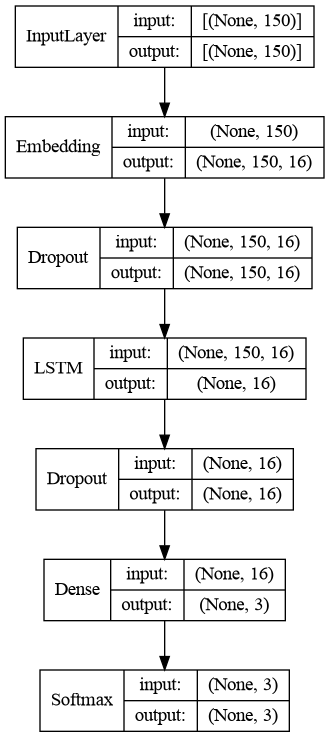

In [83]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [85]:
# Train the LSTM on the training data
goal_loss = 0.4
best_loss = 10000
patience = 1
patience_count = patience
for i in range(20):
    print(f"=== On epoch {i+1}/20: ===")
    print('Training:')
    history = model.fit(
        x_train, y_train,                   
        batch_size=256, 
        epochs=1, 
        verbose=1,
        class_weight=class_weights,
        use_multiprocessing=True,
        workers=6,
    ) 
    print('Evaluating:')
    loss, _ = model.evaluate(x_eval, y_eval)

    if loss > best_loss:
        best_loss *= 1.03
        patience_count -= 1
    else:
        best_loss = loss
        patience_count = patience

    if loss < goal_loss:
        print('Goal reached, stopping now')
        break
    if patience_count <= 0:
        print('It only getting worse, stopping now')
        break


=== On epoch 1/20: ===
Training:
258/258 [==============================] - 15s 59ms/step - loss: 0.7190 - accuracy: 0.7947
Evaluating:
2058/2058 [==============================] - 23s 11ms/step - loss: 0.6264 - accuracy: 0.7330
=== On epoch 2/20: ===
Training:
258/258 [==============================] - 15s 57ms/step - loss: 0.6923 - accuracy: 0.8004
Evaluating:
2058/2058 [==============================] - 24s 12ms/step - loss: 0.6489 - accuracy: 0.7254
It only getting worse, stopping now


In [90]:
# Write your own review
review = 'Фильм определенно хороший'
# review = 'Фильм Очень плохое кино оказался хорошим'
# review = 'Зря потраченное время'
# review = 'Ужасный фильм, зря потраченное время'
# review = 'Фильм под названием фильм является настолько плохим что плохо ужасно'
# Encode review (replace word with integers)
tmp = []
model_input = stemmer.stemWords(review.split())
model_input = prep_text(model_input, tokenizer, MAX_SEQ_LEN)

# Run your processed review against the trained model
rawprediction = model.predict(model_input)[0][0]
prediction = int(round(rawprediction))

# Test the model and print the result
print("Review: " + review)
print("Raw Prediction: " + str(rawprediction))
print("Predicted Class: " + class_names[prediction])

1/1 [==============================] - 0s 26ms/step
Review: Фильм определенно хороший
Raw Prediction: 0.1319675
Predicted Class: Positive
